<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Цель проекта: разработать метод преобразования данных в процессе машинного обучения, для защиты персональной информации.

Заказчик: страховая компания «Хоть потоп»

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Загрузим и проанализируем данные.

In [2]:
df = pd.read_csv('Ya_data/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head(20)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
df.duplicated().sum()

153

In [6]:
df.loc[df.duplicated(keep=False)].sort_values(by='Зарплата')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
...,...,...,...,...,...
2465,0,40.0,54000.0,2,0
1042,0,33.0,59300.0,2,0
2231,0,33.0,59300.0,2,0
1418,1,28.0,59900.0,0,0


В данных содержится информация о клиентах банка. 5000 объектов.\
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.\
Целевой признак: количество страховых выплат клиенту за последние 5 лет.\
Пропусков нет.
Имеется 153 дубликата. Совпадение всех 5ти признаков у одного человека маловероятно. Поэтому удалим дубликаты.


In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Дубликаты удалены.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** Качество медели не изменится при равенстве пердсказаний в исходной и преобразованной задаче $a=a'$.

Преобразованная формула обучения:
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

При этом параметры линейной регрессии в исходной задаче и в преобразованной связаны равенством:

$$
X((X^T X)^{-1} X^T y) = (XP)((((XP)^T XP)^{-1} (XP)^T y)
$$

Используя свойства матриц $(AB)^{-1} = B^{-1} A^{-1}$, $(AB)^T= B^T A^T$, $AA^{-1} = I$ раскроем скобки и сократим все что сокращается

$$
(X^T X)^{-1} X^T = P((XP)^T XP)^{-1} (XP)^T
$$

$$
(X^T X)^{-1} X^T = P((P^T (X^T X)P)^{-1} P^T X^T
$$

$$
(X^T X)^{-1}  = P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T 
$$

$$
(X^T X)^{-1} = (X^T X)^{-1}
$$

В результате сокращений матрица $P$ сократилась. Равенство предсказаний в исходной и преобразованной задаче подтверждается.



## Алгоритм преобразования

**Алгоритм**

У нас матрица признаков $X$ (без нулевого столбца)
1. Считаем квадратную матрицу $P$ размерностью равной количеству признаков (столбцов) используя функцию np.random.normal()
2. Проверим матрицу $P$ на обратимость. Посчитаем обратную матрицу функцией np.linalg.inv(). Если расчет получится, значит матрица обратима.
3. Преобразуем признаки $X$ умножив их на случайную обратимую матрицу $P$.


**Обоснование**
Качество линейной регресии не поменяется потому, что в результате обучения расчитываются коеффициэнты регресси под новые признаки.


## Проверка алгоритма

Разделим признаки и цель

In [8]:
features = df.drop('Страховые выплаты', axis = 1)
target = df['Страховые выплаты']
print('Обучающие объекты : признаки {}, цель {}'.format(features.shape, target.shape))

Обучающие объекты : признаки (4847, 4), цель (4847,)


Сгенерируем случайную квадратную матрицу с размерностью равной количеству признаков.

In [9]:
P = np.random.normal(size=(features.shape[1],features.shape[1]))
P

array([[-1.75463938, -0.84630478,  0.73929484,  0.51686758],
       [ 1.02494261, -0.56904367,  0.57625227, -0.13005872],
       [ 0.04559707, -0.11543013, -0.2788716 , -0.66067684],
       [-0.30154256,  0.58586543,  0.34124879, -0.19097012]])

Проверим матрицу на обратимость. Посчитаем обратную матрицу функцией np.linalg.inv(). Если расчет получится, значит матрица обратима.

In [10]:
np.linalg.inv(P)

array([[-0.32808522,  0.37905162, -0.28451546, -0.16182013],
       [-0.33121833, -0.29632332, -0.44720413,  0.85249372],
       [ 0.24142001,  0.71775129, -0.24101302,  0.99839748],
       [-0.06667758, -0.22503009, -1.35337052, -0.58153498]])

Преобразуем исходные признаки умножив их на случайную обратимую матрицу.

In [11]:
features_new = np.dot(features, P)
features_new

array([[  2301.58127896,  -5748.92584087, -13807.32448492,
        -32774.57758157],
       [  1779.53458621,  -4411.93520831, -10570.27195577,
        -25111.89344377],
       [   987.26186576,  -2440.53506546,  -5839.59228915,
        -13877.98526138],
       ...,
       [  1565.63653706,  -3923.29066098,  -9441.53970492,
        -22399.92785908],
       [  1510.91375291,  -3786.17302772,  -9104.66073648,
        -21607.04987571],
       [  1877.88336928,  -4702.65707358, -11304.97136229,
        -26826.79529314]])

Обучим 2 модели исходными и преобразованными признаками.

In [12]:
model = LinearRegression()
model.fit(features, target)

model_new = LinearRegression()
model_new.fit(features_new, target)

LinearRegression()

Посчитаем метрики R2 для обоих моделей

In [13]:
model.score(features, target)

0.4302010044852068

In [14]:
model_new.score(features_new, target)

0.4302010044852068

Метрики практически совпадают.

Посмотрим разницу предсказаний

<AxesSubplot:title={'center':'Разница предсказаний'}>

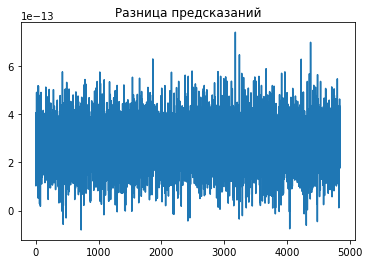

In [15]:
predictions = model.predict(features)
predictions_new = model_new.predict(features_new)
pd.Series(predictions-predictions_new).plot(title='Разница предсказаний')

Разница предсказаний составляет очень маленькие $10^{-12}$ значения

## Вывод

Решена задача защиты персональныз данных. Алгоритм основан на умножении матрици признаков на случайную обратимую матрицу. Обученная на зашифрованной таким образом матрице модель линейной регрессии обладает таким же качеством, что и обученная по исходным данным. Под любой набор признаков расчитываются коэффициэнты линейной регрессии. Проверка алгоритма показала, что обученные по исходным и по преобразованным признакам модели выдают одинаоквые предсказания и одинаковые метрики R2.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования